In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atifaliak/youtube-comments-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/youtube-comments-dataset


In [2]:
!pip install cleantext

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cleantext import clean
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
sns.set()

In [4]:
df = pd.read_csv('/kaggle/input/youtube-comments-dataset/YoutubeCommentsDataSet.csv')
df.head()

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [5]:
df.shape

(18408, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18408 entries, 0 to 18407
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comment    18364 non-null  object
 1   Sentiment  18408 non-null  object
dtypes: object(2)
memory usage: 287.8+ KB


In [7]:
df.apply(pd.isnull).sum()

Comment      44
Sentiment     0
dtype: int64

In [8]:
df.dropna(subset = ['Comment'], inplace = True)

In [9]:
df.shape

(18364, 2)

In [10]:
df.duplicated().sum()

490

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.shape

(17874, 2)

In [13]:
df['Sentiment'].value_counts()

Sentiment
positive    11054
neutral      4503
negative     2317
Name: count, dtype: int64

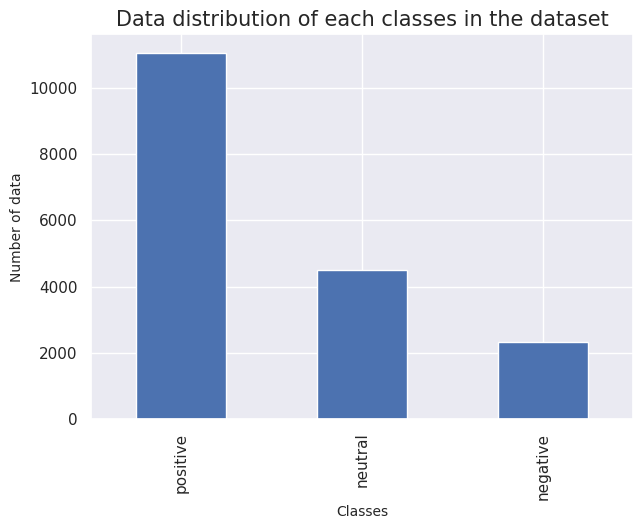

In [14]:
df['Sentiment'].value_counts().plot(kind = 'bar', figsize = (7, 5))
plt.title('Data distribution of each classes in the dataset', fontsize = 15)
plt.xlabel('Classes', fontsize = 10)
plt.ylabel('Number of data', fontsize = 10)
plt.show()

In [15]:
le = LabelEncoder()

In [16]:
df['Label'] = le.fit_transform(df['Sentiment'])

In [17]:
df.head()

,Comment,Sentiment,Label
0,lets not forget that apple pay in 2014 require...,neutral,1
1,here in nz 50 of retailers don’t even have con...,negative,0
2,i will forever acknowledge this channel with t...,positive,2
3,whenever i go to a place that doesn’t take app...,negative,0
4,apple pay is so convenient secure and easy to ...,positive,2


In [18]:
df['cleaned_comment'] = df['Comment'].apply(clean)

In [19]:
df.head()

,Comment,Sentiment,Label,cleaned_comment
0,lets not forget that apple pay in 2014 require...,neutral,1,let forget appl pay requir brand new iphon ord...
1,here in nz 50 of retailers don’t even have con...,negative,0,nz retail don’t even contactless credit card m...
2,i will forever acknowledge this channel with t...,positive,2,forev acknowledg channel help lesson idea expl...
3,whenever i go to a place that doesn’t take app...,negative,0,whenev go place doesn’t take appl pay doesn’t ...
4,apple pay is so convenient secure and easy to ...,positive,2,appl pay conveni secur easi use use korean jap...


In [20]:
X = df['cleaned_comment']
y = df['Label']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101, shuffle = True, stratify = y)

In [22]:
cv = CountVectorizer()

In [23]:
X_train_cv = cv.fit_transform(X_train).toarray()

In [24]:
X_train_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
mnb = MultinomialNB()

In [26]:
cvs_mnb = cross_val_score(mnb, X_train_cv, y_train, cv = 5)

In [27]:
print('The validation accuracy of Multinomial Naive Bayes model by CountVectorizer method (unigrams) is:', cvs_mnb.mean())

The validation accuracy of Multinomial Naive Bayes model by CountVectorizer method (unigrams) is: 0.700329226562175


In [28]:
cv2 = CountVectorizer(ngram_range = (1, 2))

In [29]:
X_train_cv2 = cv2.fit_transform(X_train).toarray()

In [30]:
cvs_mnb2 = cross_val_score(mnb, X_train_cv2, y_train, cv = 5)

In [32]:
print('The validation accuracy of Multinomial Naive Bayes model by CountVectorizer method (unigram and bigram) is:',
     cvs_mnb2.mean())

The validation accuracy of Multinomial Naive Bayes model by CountVectorizer method (unigram and bigram) is: 0.701518233427992


In [34]:
tfidf = TfidfVectorizer()

In [35]:
X_train_idf = tfidf.fit_transform(X_train).toarray()

In [36]:
X_train_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
cvs_mnb3 = cross_val_score(mnb, X_train_idf, y_train, cv = 5)

In [43]:
print('The validation accuracy of Multinomial Naive Bayes model by Tfidf Vectorizer method is:', cvs_mnb3.mean())

The validation accuracy of Multinomial Naive Bayes model by Tfidf Vectorizer method is: 0.6541716625452197


In [44]:
df1 = df[df['Sentiment'] == 'negative']
df2 = df[df['Sentiment'] == 'positive'].sample(df1.shape[0])
df3 = df[df['Sentiment'] == 'neutral'].sample(df1.shape[0])

In [45]:
df_balanced = pd.concat([df1, df2, df3])

In [46]:
df_balanced.shape

(6951, 4)

In [47]:
df_balanced['Label'].value_counts()

Label
0    2317
2    2317
1    2317
Name: count, dtype: int64

In [48]:
X_s = df_balanced['cleaned_comment']
y_s = df_balanced['Label']

In [49]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size = 0.2, random_state = 101, shuffle = True,
                                                           stratify = y_s)

In [51]:
X_train_sf = cv.fit_transform(X_train_s).toarray()

In [52]:
cvs_mnb4 = cross_val_score(mnb, X_train_sf, y_train_s, cv = 5)

In [53]:
cvs_mnb4.mean()

0.6366906474820143

In [54]:
pipeline = Pipeline([
    ('count_vectoeizer', CountVectorizer()),
    ('model', MultinomialNB())
])

In [55]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('count_vectoeizer', CountVectorizer()),
                ('model', MultinomialNB())])

In [56]:
y_pred = pipeline.predict(X_test)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.35      0.46       463
           1       0.69      0.28      0.39       901
           2       0.71      0.96      0.82      2211

    accuracy                           0.71      3575
   macro avg       0.69      0.53      0.56      3575
weighted avg       0.70      0.71      0.66      3575



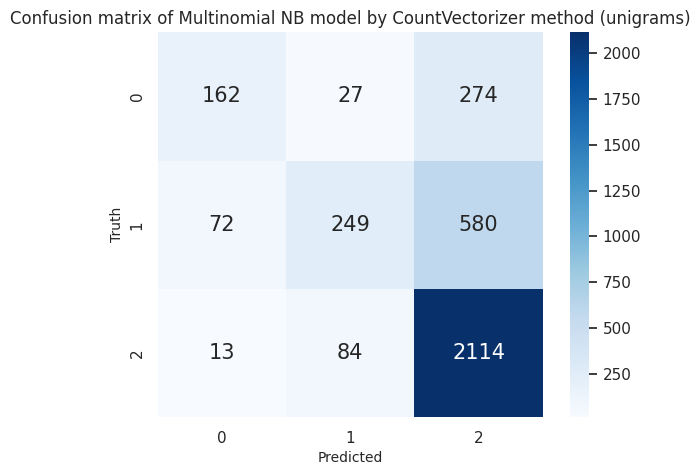

In [59]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, square = True, cbar = True, annot_kws = {'size' : 15}, fmt = 'd',
           cmap = 'Blues')
plt.title('Confusion matrix of Multinomial NB model by CountVectorizer method (unigrams)', fontsize = 12)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()